<a href="https://colab.research.google.com/github/GabeMaldonado/NLP/blob/main/NLP_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Concepts

### Tokenizing

Turning text into sequences of numbers with a number being the value of a key-value pair with the key being the word. For instance, we can replace the work **concept** with the number 5 and then replace every instance of the word with the value. 


### Embedding

The idea that words and associated words are clustered as vectors in a multi-dimensional space. 

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

--2021-03-23 01:40:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.15.80, 172.217.5.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2021-03-23 01:40:54 (283 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [2]:
#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
# Convert it to a Python list and paste it here
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [3]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
      labels.append(row[0])
      sentence = row[1]
      for word in stopwords:
        token = " "+ word + " "
        sentence = sentence.replace(token, " ")
        sentence = sentence.replace(" ", " ")
      sentences.append(sentence)
      


print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment

In [4]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

29714


In [5]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  96  176 1158 ...    0    0    0]
(2225, 2441)


In [6]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

In [7]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [8]:
# run this if using tensorflow version 1
# eager execution is enable by default in version 2

# tf.enable_eager_execution()


In [9]:
# run this to install tf datasets

# !pip install -q tensor-flow-datasets

In [10]:
# import tensorflow datasets

import tensorflow_datasets as tfds

imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete68TL9G/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete68TL9G/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete68TL9G/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


The data contains 25k examples for training and 25K examples for testing. We can split them up using the following code:


In [11]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [12]:

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []


# Iterate over the training data to extract sentences and labels
# S & L are tensors so we can extract their value by callling the numpy method 
for s, l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())


# # Iterate over the testing  data to extract sentences and labels
# S & L are tensors so we can extract their value by callling the numpy method 
for s, l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [13]:
training_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [14]:
testing_labels[0]

1

In [15]:
training_sentences[10]

'b\'During a sleepless night, I was switching through the channels & found this embarrassment of a movie. What were they thinking?<br /><br />If this is life after "Remote Control" for Kari (Wuhrer) Salin, no wonder she\\\'s gone nowhere.<br /><br />And why did David Keith take this role? It\\\'s pathetic!<br /><br />Anyway, I turned on the movie near the end, so I didn\\\'t get much of the plot. But this must\\\'ve been the best part. This nerdy college kid brings home this dominatrix-ish girl...this scene is straight out of the comic books -- or the cheap porn movies. She calls the mother anal retentive and kisses the father "Oh, I didn\\\'t expect tongue!" Great lines!<br /><br />After this, I had to see how it ended..<br /><br />Well, of course, this bitch from hell has a helluva past, so the SWAT team is upstairs. And yes...they surround her! And YES YES! The kid blows her brains out!!!! AHAHHAHAHAHA!!<br /><br />This is must-see TV. <br /><br />\''

In [16]:
testing_labels[10]

0

For trainig the labels need to be numpy arrays. Here's how to convert them:

In [17]:
training_labels_final = np.array(training_labels)
testing_labels_final  = np.array(testing_labels)

In [18]:
# tokenize snetences

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

Define the NN

In [19]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')        
                             ])

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 10

model.fit(padded,
          training_labels_final,
          epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 8s 6ms/step - loss: 0.6104 - accuracy: 0.6240 - val_loss: 0.3490 - val_accuracy: 0.8484
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2458 - accuracy: 0.9069 - val_loss: 0.3735 - val_accuracy: 0.8370
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0868 - accuracy: 0.9811 - val_loss: 0.4654 - val_accuracy: 0.8239
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0213 - accuracy: 0.9978 - val_loss: 0.5458 - val_accuracy: 0.8219
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 0.6055 - val_accuracy: 0.8232
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.6515 - val_accuracy: 0.8262
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 8.5286e-04 - accuracy: 1.0000 - val_loss: 0.6925 - val_accuracy: 0.8274
Ep

In [22]:
# get results of the embedding layer which is layer 0

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embeddig_dim)

(10000, 16)


To plot this, we need a helper function to reverse the word index. Currently, the word index has the key being the word and the value being the token for the word. This needs to be flipped around to look through the padded lsit to decode the tokens back into the words.

In [23]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [24]:
# write vectors and metadata out to files

import io
out_v = io.open('vesc.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "n")
out_v.close()
out_m.close()

In [25]:
#try:
#  from google.colab import files
#except ImportError:
#  pass
#else:
#  files.download('vescs.tsv')
#  files.download('meta.tsv')

In [26]:
sentence = "This stuff is really amazing!"
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[12, 546, 7, 68, 491]]


Another example ofthis implementation using the sarcasm dataset.

In [27]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [29]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-03-23 01:44:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.15.112, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2021-03-23 01:44:16 (256 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [30]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [31]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [32]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [33]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6671 - accuracy: 0.5893 - val_loss: 0.5795 - val_accuracy: 0.7563
Epoch 2/30
625/625 - 2s - loss: 0.4227 - accuracy: 0.8340 - val_loss: 0.3795 - val_accuracy: 0.8410
Epoch 3/30
625/625 - 2s - loss: 0.3043 - accuracy: 0.8787 - val_loss: 0.3509 - val_accuracy: 0.8505
Epoch 4/30
625/625 - 2s - loss: 0.2546 - accuracy: 0.9016 - val_loss: 0.3415 - val_accuracy: 0.8587
Epoch 5/30
625/625 - 2s - loss: 0.2189 - accuracy: 0.9150 - val_loss: 0.3436 - val_accuracy: 0.8580
Epoch 6/30
625/625 - 2s - loss: 0.1912 - accuracy: 0.9270 - val_loss: 0.3537 - val_accuracy: 0.8544
Epoch 7/30
625/625 - 2s - loss: 0.1708 - accuracy: 0.9359 - val_loss: 0.3655 - val_accuracy: 0.8535
Epoch 8/30
625/625 - 2s - loss: 0.1522 - accuracy: 0.9455 - val_loss: 0.3805 - val_accuracy: 0.8536
Epoch 9/30
625/625 - 2s - loss: 0.1360 - accuracy: 0.9510 - val_loss: 0.3994 - val_accuracy: 0.8521
Epoch 10/30
625/625 - 2s - loss: 0.1228 - accuracy: 0.9570 - val_loss: 0.4228 - val_accuracy: 0.8483

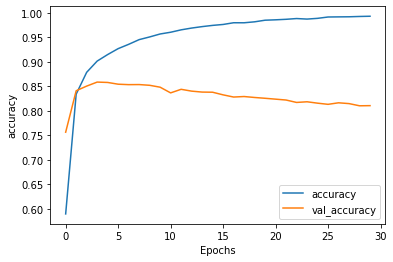

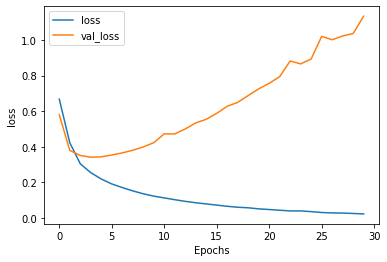

In [37]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [38]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [39]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [40]:
import io

out_v = io.open('vecs_imdb.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_imdb.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [41]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs_imdb.tsv')
  files.download('meta_imdb.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[7.5576282e-01]
 [1.5962333e-06]]


In [43]:
# Repeat the process using subwords

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteH3MVFJ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteH3MVFJ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteH3MVFJ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [44]:
train_data, test_data = imdb['train'], imdb['test']

In [45]:
tokenizer = info.features['text'].encoder

In [46]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [47]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [48]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [49]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [50]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [51]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 11s 25ms/step - loss: 0.6898 - accuracy: 0.5375 - val_loss: 0.6470 - val_accuracy: 0.6550
Epoch 2/10
391/391 [==============================] - 10s 25ms/step - loss: 0.5941 - accuracy: 0.7715 - val_loss: 0.4633 - val_accuracy: 0.8398
Epoch 3/10
391/391 [==============================] - 10s 25ms/step - loss: 0.4067 - accuracy: 0.8645 - val_loss: 0.3723 - val_accuracy: 0.8563
Epoch 4/10
391/391 [==============================] - 10s 25ms/step - loss: 0.3224 - accuracy: 0.8904 - val_loss: 0.3316 - val_accuracy: 0.8746
Epoch 5/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2753 - accuracy: 0.9046 - val_loss: 0.3206 - val_accuracy: 0.8724
Epoch 6/10
391/391 [==============================] - 10s 24ms/step - loss: 0.2380 - accuracy: 0.9165 - val_loss: 0.3078 - val_accuracy: 0.8812
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2176 - accuracy: 0.9251 - val_loss: 0.3185 - val_accuracy:

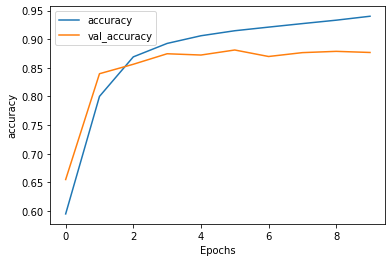

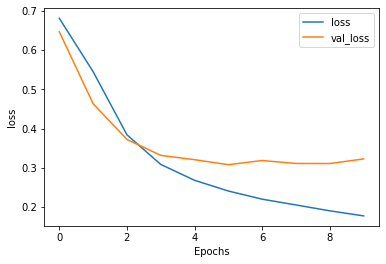

In [52]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Analyze text data from the BBC

In [53]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2021-03-23 02:29:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2021-03-23 02:29:14 (222 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [54]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [55]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [56]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [57]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [58]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [59]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [60]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [62]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7528 - accuracy: 0.2343 - val_loss: 1.7139 - val_accuracy: 0.1978
Epoch 2/30
56/56 - 0s - loss: 1.6688 - accuracy: 0.3730 - val_loss: 1.6272 - val_accuracy: 0.4697
Epoch 3/30
56/56 - 0s - loss: 1.5699 - accuracy: 0.5551 - val_loss: 1.5222 - val_accuracy: 0.5236
Epoch 4/30
56/56 - 0s - loss: 1.4411 - accuracy: 0.4899 - val_loss: 1.3832 - val_accuracy: 0.5303
Epoch 5/30
56/56 - 0s - loss: 1.2787 - accuracy: 0.5393 - val_loss: 1.2303 - val_accuracy: 0.5528
Epoch 6/30
56/56 - 0s - loss: 1.1145 - accuracy: 0.6185 - val_loss: 1.0879 - val_accuracy: 0.6494
Epoch 7/30
56/56 - 0s - loss: 0.9734 - accuracy: 0.6983 - val_loss: 0.9661 - val_accuracy: 0.7124
Epoch 8/30
56/56 - 0s - loss: 0.8574 - accuracy: 0.7449 - val_loss: 0.8744 - val_accuracy: 0.7371
Epoch 9/30
56/56 - 0s - loss: 0.7589 - accuracy: 0.7809 - val_loss: 0.7879 - val_accuracy: 0.7506
Epoch 10/30
56/56 - 0s - loss: 0.6686 - accuracy: 0.8051 - val_loss: 0.7175 - val_accuracy: 0.7843
Epoch 11/30
56/56 -

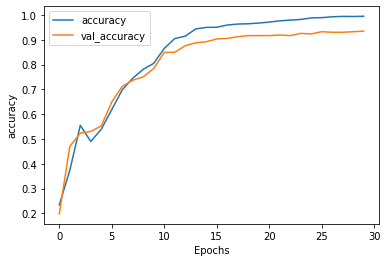

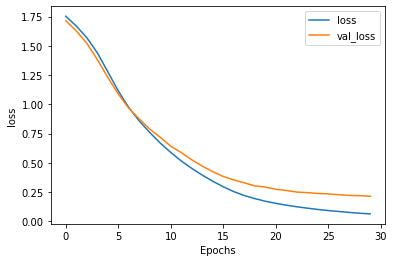

In [63]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [64]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [65]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [66]:
import io

out_v = io.open('vecs_bbc.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_bbc.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [67]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs_bbc.tsv')
  files.download('meta_bbc.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Text Generation

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [9]:
tokenizer = Tokenizer()


corpus = data.lower().split("\n")
data = "You are appreciated When I was young,\n me and my mama had beef Seventeen years old, kicked out on the streets \nThough back at the time I never thought I'd see her face \nAin't a woman alive that could take my mama's place \nSuspended from school, and scared to go home, \nI was a fool With the big boys breakin' all the rules \nI shed tears with my baby sister, over the years \nWe was poorer than the other little kids \nAnd even though we had different daddies, \nthe same drama When things went wrong we'd blame Mama \nI reminisce on the stress I caused, \nit was hell Huggin' on my mama from a jail cell \nAnd who'd think in elementary, hey I'd see the penitentiary one day? \nAnd runnin' from the police, that's right  Mama catch me, put a whoopin' to my backside \nAnd even as a crack fiend, Mama  You always was a black queen, Mama I finally understand \nFor a woman it ain't easy tryin' to raise a man You always was committed \nA poor single mother on welfare, tell me how you did it \nThere's no way I can pay you back \nBut the plan is to show you that I understand \nYou are appreciated Lady, don't you know we love you? (Dear Mama) \nSweet lady, place no one above you (You are appreciated) \nSweet lady, don't you know we love you? Now, ain't nobody tell us it was fair  \nNo love from my daddy, 'cause the coward wasn't there \nHe passed away and I didn't cry, 'cause my anger Wouldn't let me feel for a stranger \nThey say I'm wrong and I'm heartless, but all along \nI was lookin' for a father, he was gone  I hung around with the thugs  \nAnd even though they sold drugs \nThey showed a young brother love I moved out and started really hangin' \nI needed money of my own, so I started slangin' \nI ain't guilty, 'cause even though I sell rocks \nIt feels good puttin' money in your mailbox \nI love payin' rent when the rent's due \nI hope you got the diamond necklace that I sent to you \nCause when I was low you was there for me \nAnd never left me alone, because you cared for me And \nI could see you comin' home after work late \nYou're in the kitchen, tryin' to fix us a hot plate \nYou just workin' with the scraps you was given \nAnd Mama made miracles every Thanksgivin' \nBut now the road got rough, you're alone \nYou're tryin' to raise two bad kids on your own \nAnd there's no way I can pay you back But my plan is to show you that I understand"

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 

print(tokenizer.word_index)
print(total_words)

{'i': 1, 'you': 2, 'the': 3, 'and': 4, 'a': 5, 'was': 6, 'my': 7, 'mama': 8, 'to': 9, 'me': 10, 'on': 11, 'it': 12, 'for': 13, 'love': 14, 'when': 15, 'though': 16, "ain't": 17, 'that': 18, 'from': 19, 'with': 20, 'we': 21, 'even': 22, 'no': 23, 'but': 24, 'are': 25, 'appreciated': 26, 'back': 27, 'see': 28, 'in': 29, 'understand': 30, "tryin'": 31, 'lady': 32, "'cause": 33, 'they': 34, "you're": 35, 'young': 36, 'had': 37, 'years': 38, 'out': 39, 'never': 40, "i'd": 41, 'woman': 42, 'could': 43, 'place': 44, 'home': 45, 'all': 46, 'kids': 47, 'wrong': 48, 'one': 49, 'always': 50, 'raise': 51, 'tell': 52, "there's": 53, 'way': 54, 'can': 55, 'pay': 56, 'plan': 57, 'is': 58, 'show': 59, "don't": 60, 'know': 61, 'sweet': 62, 'now': 63, 'us': 64, 'there': 65, 'he': 66, "i'm": 67, 'started': 68, 'money': 69, 'own': 70, 'your': 71, 'got': 72, 'alone': 73, 'beef': 74, 'seventeen': 75, 'old': 76, 'kicked': 77, 'streets': 78, 'at': 79, 'time': 80, 'thought': 81, 'her': 82, 'face': 83, 'alive':

In [10]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [12]:
print(tokenizer.word_index['you'])
print(tokenizer.word_index['are'])
print(tokenizer.word_index['appreciated'])
print(tokenizer.word_index['when'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['was'])
print(tokenizer.word_index['young'])
print(tokenizer.word_index['me'])

2
25
26
15
1
6
36
10


In [13]:
print(xs[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10]


In [14]:
print(ys[6])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  2 25 26 15  1  6]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
print(tokenizer.word_index)

{'i': 1, 'you': 2, 'the': 3, 'and': 4, 'a': 5, 'was': 6, 'my': 7, 'mama': 8, 'to': 9, 'me': 10, 'on': 11, 'it': 12, 'for': 13, 'love': 14, 'when': 15, 'though': 16, "ain't": 17, 'that': 18, 'from': 19, 'with': 20, 'we': 21, 'even': 22, 'no': 23, 'but': 24, 'are': 25, 'appreciated': 26, 'back': 27, 'see': 28, 'in': 29, 'understand': 30, "tryin'": 31, 'lady': 32, "'cause": 33, 'they': 34, "you're": 35, 'young': 36, 'had': 37, 'years': 38, 'out': 39, 'never': 40, "i'd": 41, 'woman': 42, 'could': 43, 'place': 44, 'home': 45, 'all': 46, 'kids': 47, 'wrong': 48, 'one': 49, 'always': 50, 'raise': 51, 'tell': 52, "there's": 53, 'way': 54, 'can': 55, 'pay': 56, 'plan': 57, 'is': 58, 'show': 59, "don't": 60, 'know': 61, 'sweet': 62, 'now': 63, 'us': 64, 'there': 65, 'he': 66, "i'm": 67, 'started': 68, 'money': 69, 'own': 70, 'your': 71, 'got': 72, 'alone': 73, 'beef': 74, 'seventeen': 75, 'old': 76, 'kicked': 77, 'streets': 78, 'at': 79, 'time': 80, 'thought': 81, 'her': 82, 'face': 83, 'alive':

In [17]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
13/13 [==============================] - 33s 7ms/step - loss: 5.4146 - accuracy: 0.0064
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 5.3959 - accuracy: 0.0464
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 5.3571 - accuracy: 0.0449
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 5.2838 - accuracy: 0.0285
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 5.1330 - accuracy: 0.0393
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 5.0354 - accuracy: 0.0489
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 4.9810 - accuracy: 0.0518
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 4.9605 - accuracy: 0.0502
Epoch 9/500
13/13 [==============================] - 0s 6ms/step - loss: 4.9653 - accuracy: 0.0455
Epoch 10/500
13/13 [==============================] - 0s 6ms/step - loss: 4.9465 - accuracy: 0.0548
Epoch 11

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

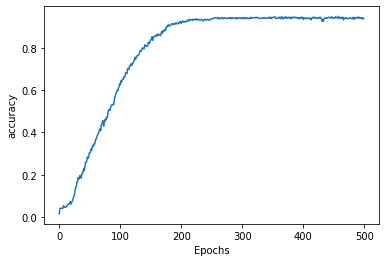

In [19]:
plot_graphs(history, 'accuracy')


In [20]:
seed_text = "When i was young"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


When i was young young young moved out and started really hangin' hangin' thugs hangin' sold late thugs late late late late say fool that though but but all along along late along rules rules rules time i sent to you that own i hangin' sold late thugs late late late sold fair thugs late fair late fair late thugs thugs thanksgivin' thugs thugs thugs rules fool that i sent to you that i understand different late thugs late late sold late thugs late late late thugs thugs thanksgivin' thugs thugs thanksgivin' late thought i'd see us it it was fair fair fair fair


A different example of the implementation above


In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-03-25 02:46:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2021-03-25 02:46:26 (135 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [7]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
print (model.summary())
print(model)


Epoch 1/100
377/377 [==============================] - 6s 9ms/step - loss: 6.8413 - accuracy: 0.0635
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 5.7835 - accuracy: 0.1093
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 4.8168 - accuracy: 0.1690
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 3.8893 - accuracy: 0.2507
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 3.0282 - accuracy: 0.3578
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 2.3612 - accuracy: 0.4731
Epoch 7/100
377/377 [==============================] - 4s 10ms/step - loss: 1.8360 - accuracy: 0.5760
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 1.5707 - accuracy: 0.6307
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 1.3038 - accuracy: 0.6925
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 1.1109

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

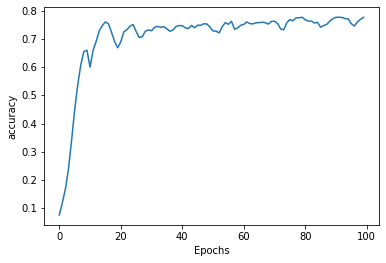

In [12]:
plot_graphs(history, 'accuracy')


In [13]:
seed_text = "What is about to happen"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


What is about to happen drink with old rosin the bow may dublin city are deceive not weary more day placed may friends gone hill me spirits never would deceive me roared day than me by me proud eyes sinking far gone by mooncoin saying eyes stuck colleen fair colleen stretched out fond since you gone and put without rest far said she sheriff elf he take delight in fishin me by far far far far aisey like politicians down on the rocky road down gone alas is right colleen eyes gone and my rapier are into tomorrow i meet you would say an house


## Supervised ML & Sentiment Analysis

In supervised ML we have input features *X* and a set of labels *Y*. To get the most accurate predictoins based on the data, the goal is to minimize the error rate or cost as much as possible. To do this, we run the prediction function which takes in parameters data to map the features to output labels *Y hat*. The best mapping from the features to the labels is achieved when the difference between the expected values *Y* and teh predicted values *Y hat* is minimized.  The cost function does this by comparing how closely the output *Y hat* is to the label. Then we can update parameters and repeat the whole process until the cost is minimized. 

![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/3vVQr0zhTlW1UK9M4V5Vww_e5b656e0d36041e1be5edd54bd3562a5_Screen-Shot-2020-09-01-at-7.35.25-AM.png?expiry=1617321600000&hmac=k7PV-z_vMvJiULYhnmwqqe3557dwLDggjwTibP8lQiA)


To apply NLP to a tweet, for instance, we first need to represent the text/tweet ("I'm happy to learn NLP") as features, then train the Logistic Regression classifier and then we can use it to classify text. The output of the classifier would be either 1 for positive sentiment or 0 for negative sentiment. 
![alt text](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/z84yBRbCS0qOMgUWwktKdA_927d67ce246c4212ad9d389a0243ed0e_Screen-Shot-2020-09-01-at-7.41.26-AM.png?expiry=1617321600000&hmac=0dsjC9-oMKwiFUjei1yyJN2wEu44BRZxUgBrggCh7f4)

### Vocabulary and Feature Extraction

Given some text/tweet , it can be represented as a vector of dimension *V* where *V* corresponds to teh vocabulary size. If we have the text "I am happy to learn NLP" tehn we would put a 1 in the corresponding index for any workd in the text and 0 otherwise. The issue with this approach is that *V* gets larger adn the vector becomes more sparse. We also end up with too many features which results in larger training and prediction time. 

### Preprocessing

To preprocess the text, we must perform the following:

1. Eliminates handles and URL
2. Tokenize the string into words
3. Remove stop words such as *and, is, a , on, at, etc.*
4. Stemming or converting every word to its stem
5. Convert all words to lowercase



## Preprocessig Data Lab

Here we'll explore how to preprocess data/tweets for sentiment analysis using the Natural Language Toolkit (NLTK) library which has modules for collecting, handling, and processing twitter data. NLTK also has a twitter dataset that we will use for this lab. 
The twitter dataset contains 10000 samples. 5000 positive tweets and 5000 negative tweets. This dataset has been artificially balanced and does not reflect the real distributions of positive and negative classes in live twitter streams.


In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [3]:
# download data
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

We can now load the text fields for the positive and negative tweets using the module's `strings()` method:

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


Print the lenght of the negative and positive tweets and explore the data structure.

In [6]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000


In [10]:
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('\nThe type of all_negative_tweets is: ', type(all_negative_tweets))
print('\nThe type of a tweet entry is: ', type(all_negative_tweets[0]))


The type of all_positive_tweets is:  <class 'list'>

The type of all_negative_tweets is:  <class 'list'>

The type of a tweet entry is:  <class 'str'>


In [11]:
print(all_positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [12]:
print(all_negative_tweets[0])

hopeless for tmr :(


We can see that the data are stored as a list and the individual tweets are stored as strings. We also printed the firt tweets for each category. 
Let's see if we can use a pie chart to visualize this data.

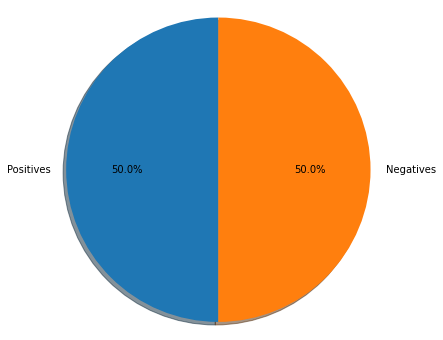

In [13]:
# create figure instance

fig = plt.figure(figsize=(6,6))

# create labels for teh two classes
labels = 'Positives', 'Negatives'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# equal aspect ratio to ensure pie is drawn as a circle
plt.axis('equal')

# Display chart

plt.show()

To better understand the data we're working with, we can print random tweets for us to take a look. Positive tweets will be printed in green and negative in red. 

In [41]:
# print positive in green
print('\033[92m' + all_positive_tweets[random.randint(0, 5000)])

# negative tweets in red
print('\033[91m' + all_negative_tweets[random.randint(0, 5000)])

One more sleep til the wedding :-)
@ayyedolans IM NOT UNTIL THE TWINS FOLLOW ME BACK BYLFNNZ :(


### Preprocessing Raw Text for Sentiment Analysis

Data preprocessing is a critical step in any ML project. This step includes cleaning and formatting the data before feeding it to the ML algorithm. For NLP, the preprocessing steps are comprised of the following tasks:
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

Let's apply these principles to a complex enough tweet.

In [43]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [44]:
# download stopword list from nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In this step we are going to remove hyperlinks, twitter marks and styles such as hashtags and retweet tags. We'll use regular expressions to do this. We'll define the  search pattern and use the `sub()` method to remove any matches nad replaced them with an empty character. `''`


In [47]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text 'RT'
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only remmove the hasg sign from teh word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


## Tokenize the string
Tokenizing means to split the strings into individual words without blanks or tabs. We will use the `tokenize` module from NLTK. In this step, we will also convert all the text to lowercase. 

In [49]:
print()
print('\033[92m' + tweet2)
print('\033[94m')


# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                           reduce_len=True)

# tokenize tweets

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Removing Stopwords and Punctuation
The next step in the process is to remove stop words and punctuation. Stop words are words that do not add any significant meaning to the text. Below is the list of stopwords provided by NLTK.

In [56]:
#@title Default title text
# import the english stopword list from NLTK

stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english[:])

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

**Bonus**
Print stopword list for the Spanish language

In [57]:
stopwords_spanish = stopwords.words('spanish')
print('Stop words\n')
print(stopwords_spanish)

Stop words

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis',

Looking at the stopwords we can see that there are words that could be important in some contexts. For instance, the words, *i, not, bwtwee, because* could indeed provide some value to the text. We might need to customize the stop word list for some applications. Punctuation when grouped in acertain way can be used to show emotion. Cosider the characters :) or :( are often used to represent emotions. In the context of tweets, these can be left alone but in other contexts such as in medicine, these should be removed. 
Let's clean up the tokenized text.

In [58]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:     # iterate through the tokens lists
  if (word not in stopwords_english and 
      word not in string.punctuation):
      tweets_clean.append(word)

print('Removed stop words and punctuation:')
print(tweets_clean)
    




['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming

Stemming is the process of converting a word to its most general form or stem. This helps us reduce the sie of our vocabulary. For instance the words:
* learn
* learning
* learned
* learnt 
all have the same common root *learn*. Keep in mind that in some cases the steamming process produces words that are not spelled correctly such as **happi** and **sunni**.

NLTK has different modules for stemming but here we'll use the PorterStemmer module.

In [59]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# instantiate stemming class
stemmer = PorterStemmer()

# create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


All the steps above can be implemented as a function:


In [60]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

## Logistic Regression Overview

Logistic Regression makes use of the *sigmoid function* which outputs a probability between **0** and **1**. The sigmoid function with some weight parameter 𝞱 and some input $x^i$ is defined as follows:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/oL4Ox_JxTBi-DsfycUwYvw_d0582a0dddf7470486f0955c8b025dd6_Screen-Shot-2020-09-01-at-8.30.00-AM.png?expiry=1618531200000&hmac=CtXjkerDr3vhcdD9hsY7T5RGKA6HfyJOdm81kA3pbng)


Note that as $𝞱^T x^i$  gets closer and closer to - ∞ the denominator of the sigmoid function gets larger and larger and as a result, the sigmoid get closer to 0. On the other hand, as $𝞱^T x^i$ gets closer and closer to ∞ the denominator of the sigmoid function gets closer to 1 and as a result the sigmoid also gets closer to 1.

Given a tweet, we can transform it into a vector and run it through the sigmoid function to get a prediction as follows:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/THV0BbogT2i1dAW6IA9oMg_67bcc86617b54ac4b5750d51d032cd8f_Screen-Shot-2020-09-01-at-8.37.07-AM.png?expiry=1618531200000&hmac=KKXqJQXvVEj51fVbHJWwVn-ABfyG8Y9LTXmfHMmQ1kg)

## Logistic Regression Training

To train the logistic regression function we do the following:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/YGmjEyR0Sw2poxMkdBsNeQ_74cb9a1075fb4d1eb835b14a8d5b2456_Screen-Shot-2020-09-01-at-8.39.39-AM.png?expiry=1618531200000&hmac=lq5N2jJMhvEUIGLbbaot76uNgUvKdMKzMN8KyrUJyh4)

We initilize the parameter 𝞱 that we can use in the sigmoid function, then we compute the gradient that will be used to update 𝞱 and the calculate the cost. We can continue to do this until the cost converges. 

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/kj9HzV22Qp2_R81dttKdLw_97bb4671b7384b0c8b8dbf59b253dea1_Screen-Shot-2020-09-01-at-8.49.51-AM.png?expiry=1618531200000&hmac=2BXhkILQdcjEEhpYxIBYAgz7Rpp8tbsA1tbq31cL20Y)

## Logistic Regression Testing

to test the model we would need to run a subset of the data, the *validation set* on the model to get the predictions. The predictions are the outputs of the sigmoid function. If the output is ≥ 0.5 we would assign it to a positive class otherwise we would assign it to a negative class. 

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/xq8RYoHvROKvEWKB73TiUg_ac2e78d0c6654f58ab40822d08b68465_Screen-Shot-2020-09-02-at-10.47.33-AM.png?expiry=1618531200000&hmac=1KhBSjfTuBCLQaPh6BPK0qsXwmjHkI8ccM7KX-EdOh0)


To compute accuracy, we can use the following equation:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/1NW_9EVkS6yVv_RFZGusFA_90304c432911444eb5f981a4aaa97c47_Screen-Shot-2020-09-02-at-10.53.31-AM.png?expiry=1618531200000&hmac=IRmRztJo1EBdlqvUOihKix0Q1HbO-k6EvdXS95j8ZFI)

We would go over all the training examples, $m$ of them, and for every correct prediction we add 1 and the we divide by $m$.